# Least Squares Linear Regression 




## Math behind it
---


We model the relationship between $ x $ and $ y $ as:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$

Where:
- $ y_i $: observed/actual output (dependent variable)
- $ \hat{y}_i = \beta_0 + \beta_1 x_i $: predicted output
- $ x_i $: input (independent variable)
- $ \beta_0 $: intercept
- $ \beta_1 $: slope
- $ \varepsilon_i $: error (residual)



<br><br>
Our goal is to minimize the Residual Sum of Squares (RSS), which is the total squared prediction error:

$$
\text{RSS} = \sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2
$$


We can optimize the parameters $ \beta_0  $ and $ \beta_1 $ with some simple calculus (ie. taking the partial derivative and setting it to 0) to arrive at the closed-form solutions for these parameters: 

$$
\beta_1 = \frac{\sum x_i y_i - n \bar{x} \bar{y}}{\sum x_i^2 - n \bar{x}^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

See the below images for the step-by-step math involved with arriving at the aforementioned paramters: 

---

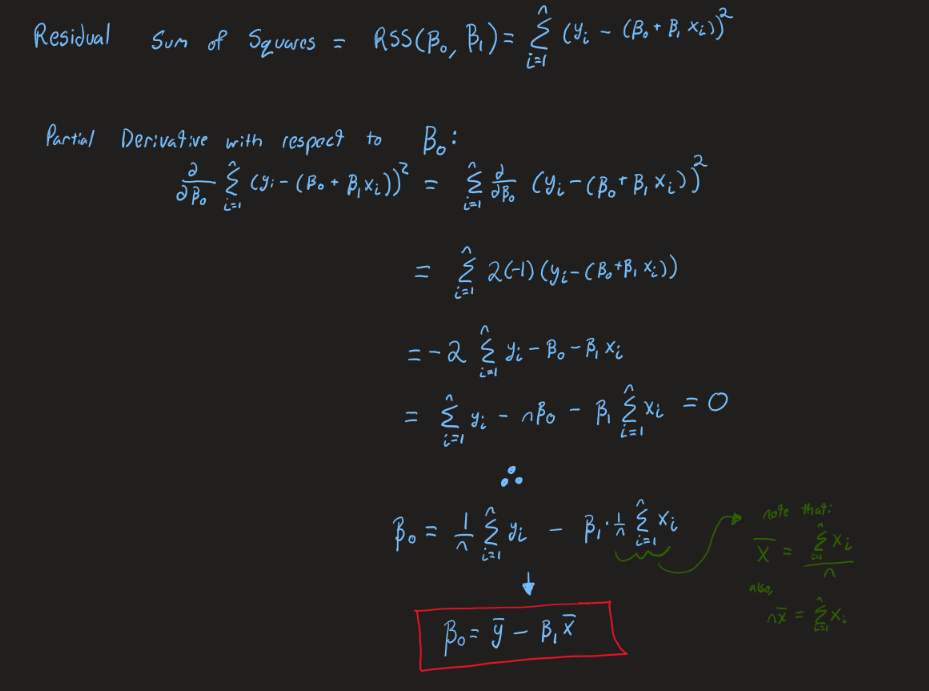

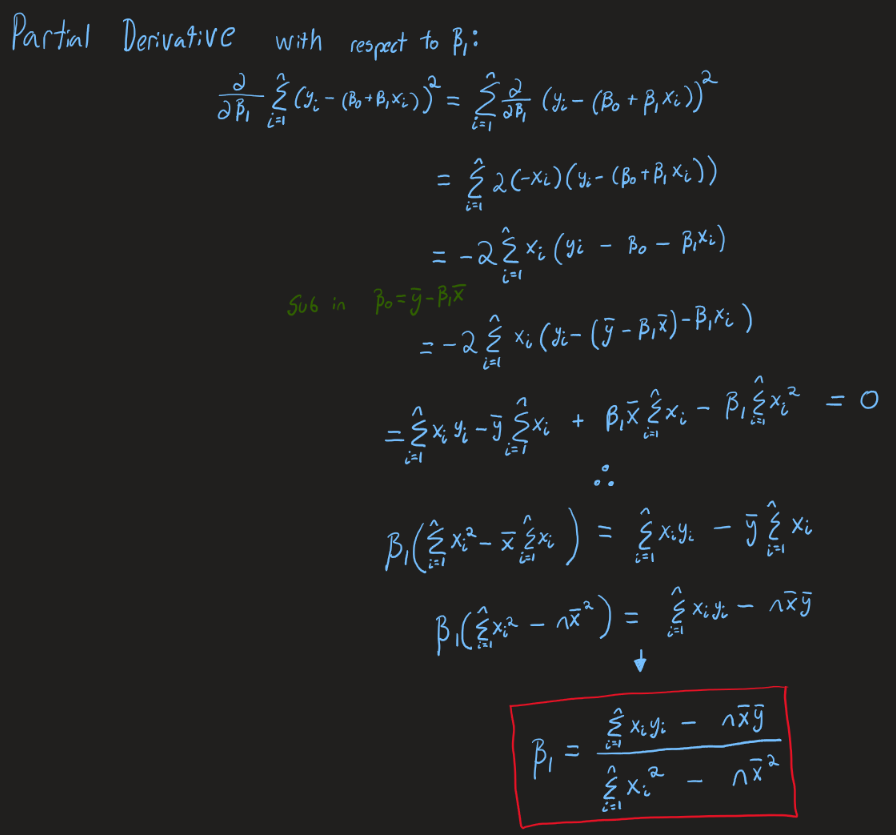

## Code
---

In [33]:
class LinearRegression:
    def __init__(self):
        self.beta_0 = None  # Intercept
        self.beta_1 = None  # Slope


    def fit(self, x, y):
        n = len(x)

        x_mean = sum(x) / n
        y_mean = sum(y) / n
        sum_xy = sum(x[i] * y[i] for i in range(n))
        sum_x_squared = sum(x[i] ** 2 for i in range(n))

        # Calculate slope (beta1)
        beta_1_numerator = sum_xy - n * x_mean * y_mean
        beta_1_denominator = sum_x_squared - n * x_mean ** 2
        self.beta_1 = beta_1_numerator / beta_1_denominator

        # Calculate intercept (beta0)
        self.beta_0 = y_mean - self.beta_1 * x_mean


    def predict(self, x_new):
        return [self.beta_0 + self.beta_1 * x_i for x_i in x_new]

    def rss(self, x, y):
        predictions = self.predict(x)
        return sum((y[i] - predictions[i]) ** 2 for i in range(len(y)))

    def coefficients(self):
        return  self.beta_0, self.beta_1  



## Testing Model
---



### Imports

In [29]:
%pip install matplotlib scikit-learn pandas --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Test #1: Syntethic Dataset - y=2x+1

Slope: 2.00000000
Intercept: 1.00000000
Regression Line: y = 1.0 + 2.0x
Residual Sum of Squares(RSS): 0.0

Predictions on test data: 
 x = 5 -> y = 11.00
 x = 6 -> y = 13.00


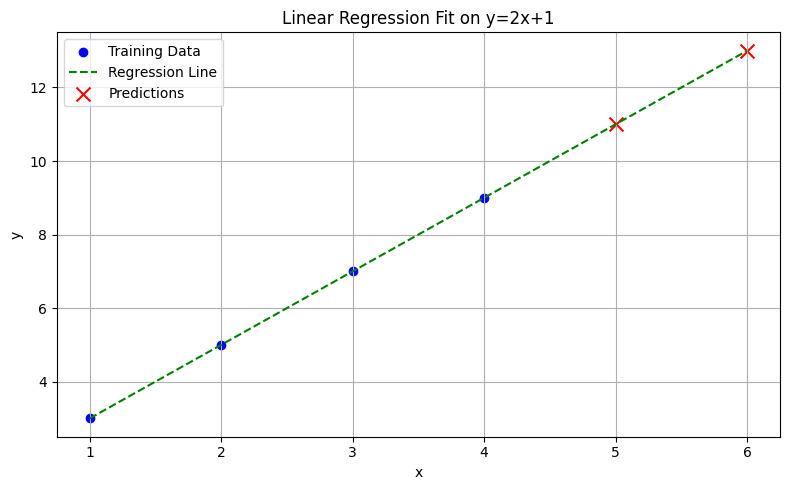

In [34]:
import matplotlib.pyplot as plt

# Sample data  --> y = 2x + 1
x = [1, 2, 3, 4]
y = [3, 5, 7, 9]

# Train model
model = LinearRegression()
model.fit(x, y)

# Predict
x_test = [5, 6]
predictions = model.predict(x_test)

# Output results
beta_0, beta_1 = model.coefficients()
print(f"Slope: {beta_1:.8f}")
print(f"Intercept: {beta_0:.8f}")
print(f"Regression Line: y = {beta_0} + {beta_1}x")
print(f"Residual Sum of Squares(RSS): {model.rss(x, y)}")

print("\nPredictions on test data: ")
for i in range(len(x_test)):
    x_val = x_test[i]
    y_pred = predictions[i]
    print(f" x = {x_val} -> y = {y_pred:.2f}")


# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x + x_test, model.predict(x + x_test), color='green', linestyle='--', label='Regression Line')
plt.scatter(x_test, predictions, color='red', marker='x', s=100, label='Predictions')

plt.title("Linear Regression Fit on y=2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Test #2: Real Dataset - Diabetes


------- Data -------
     target       bmi
0     151.0  0.061696
1      75.0 -0.051474
2     141.0  0.044451
3     206.0 -0.011595
4     135.0 -0.036385
..      ...       ...
437   178.0  0.019662
438   104.0 -0.015906
439   132.0 -0.015906
440   220.0  0.039062
441    57.0 -0.073030

[442 rows x 2 columns]


--- Model Stats ----
Slope: 985.23842866
Intercept: 153.16225437
Regression Line: y = 153.1622543698309 + 985.2384286608361x

Residual Sum of Squares(RSS): 1721331.4763498337
RMSE: 59.87
MAE: 48.74
R² Score: 0.2101


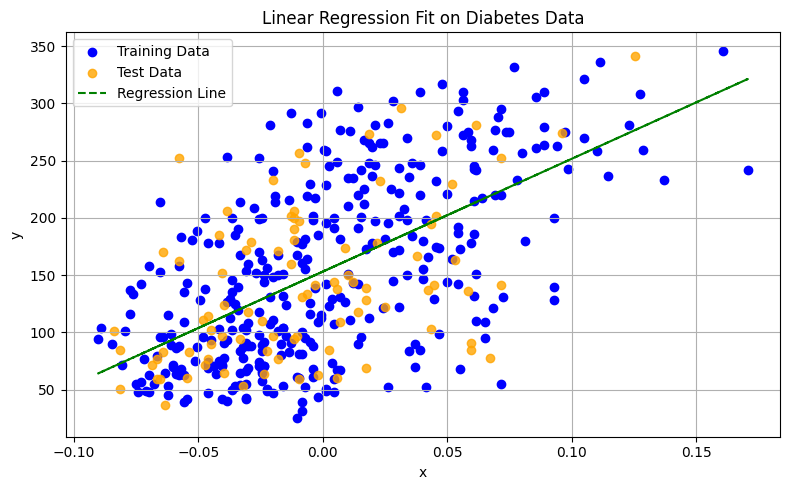

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Load data
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame[['target', 'bmi']]

print(" Data ".center(20, "-"))
print(f"{df}\n\n")
x = df['bmi'].to_list()
y = df['target'].to_list()


# Train/Test split --> 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=69)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)


# Output model stats
print(" Model Stats ".center(20, "-"))
beta_0, beta_1 = model.coefficients()
print(f"Slope: {beta_1:.8f}")
print(f"Intercept: {beta_0:.8f}")
print(f"Regression Line: y = {beta_0} + {beta_1}x")
print(f"\nResidual Sum of Squares(RSS): {model.rss(x, y)}")

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Coefficient of determination --> how much of the variance in y is explained by the model 

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='orange', alpha=0.8, label='Test Data')
plt.plot(x, model.predict(x), color='green', linestyle='--', label='Regression Line')

plt.title("Linear Regression Fit on Diabetes Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
